In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [49]:
if False:
    reader = pd.read_csv("/home/pau/Desktop/Quart Curs/TFG/Dades/Fitxers_posturograf_IMU/Fitxers per entrenar/2022060804_sve_GP53F.txt", delimiter="\t", encoding="cp1252", chunksize=1)
    df_dades = reader.get_chunk()
    print(df_dades)
    print(df_dades.columns)

    count=0
    for i in df_dades.columns:
        print(i, count)
        count+=1


#reader = pd.read_csv("../../dades/dades posturograf/2022071305_sve_FJ52F.txt", delimiter="\t", encoding="ansi", chunksize=2)
reader = pd.read_csv("/home/pau/Desktop/Quart Curs/TFG/Dades/Fitxers_posturograf_IMU/Fitxers per entrenar/2022060804_sve_GP53F.txt", delimiter="\t", encoding="cp1252", skiprows=1, chunksize=1, header=None)

df_dades = reader.get_chunk()
#print(df_dades)
#print(df_dades.columns)
#num_test = df_dades[['Nº_ROA','Nº_ROC','Nº_RGA','Nº_RGC']].values.tolist()

#'Nº_test', 'Val_test',Rep_test', 'EstML_test', 'EstAP_test'
roa = df_dades.iloc[:,16:21].values.tolist()
roc = df_dades.iloc[:,21:26].values.tolist()
rga = df_dades.iloc[:,26:31].values.tolist()
rgc = df_dades.iloc[:,31:36].values.tolist()

##SOM VIS VEST
result = df_dades.iloc[:,53:56].values.tolist()

print(roa)
print(roc)
print(rga)
print(rgc)
print(result)

num_test = roa[0][0] + roc[0][0] + rga[0][0] + rgc[0][0]
print("Total tests")
print(num_test)

[[2.0, 100.0, 100.0, 100.0, 97.498957]]
[[2.0, 100.0, 100.0, 100.0, 97.649432]]
[[2.0, 99.076211, 100.0, 100.0, 100.0]]
[[2.0, 100.0, 100.0, 100.0, 100.0]]
[[98.347141, 96.619423, 100.0]]
Total tests
8.0


In [4]:
print(roc[0][1]/roa[0][1])
print(rga[0][1]/roa[0][1])
print(rgc[0][1]/roa[0][1])


1.0
0.99076211
1.0


In [50]:
reader = pd.read_csv("/home/pau/Desktop/Quart Curs/TFG/Dades/Fitxers_posturograf_IMU/Fitxers per entrenar/2022062206_sve_IB53F.txt", delimiter="\t", encoding="cp1252", skiprows=2, chunksize=num_test, index_col=False)
df_resultats = reader.get_chunk()

df_resultats


,NºHistorial,Prueba ROMBERG,Numero,Desplaz.Total(mm),Angulo Desplaz.(º),Dispers ML (mm),Dispers AP (mm),Area barrida (mm2),Velocidad media (m/s),Desplazam.ML (mm),Desplazam.AP(mm),Fuerza Max ML (N),Fuerza Max AP (N),Frec (Hz),Duración (s)
0,2022062206,ROA,1,3.072872,112.816361,2.961262,5.440192,39.258346,0.0,15.093263,20.409833,3.809941,2.314077,40.0,30.0
1,2022062206,ROA,2,4.507956,162.616144,3.141939,2.895034,36.058194,0.0,17.582619,19.550981,3.689099,5.296847,40.0,30.0
2,2022062206,ROC,3,3.963237,188.929031,2.847869,3.611976,35.145088,0.0,11.525907,20.152986,2.767201,6.072078,40.0,30.0
3,2022062206,ROC,4,5.645548,181.284555,1.830460,2.989825,21.234840,0.0,9.632593,15.893307,2.484834,3.911018,40.0,30.0
4,2022062206,RGA,5,39.721638,79.327243,4.825975,6.807244,130.455662,0.0,30.918219,33.993403,9.029952,7.102580,40.0,30.0
5,2022062206,RGA,6,10.949781,59.426760,3.769926,4.783652,71.740842,0.0,24.852939,26.879487,6.591142,7.331540,40.0,30.0
6,2022062206,RGC,7,20.218701,108.740066,19.416606,24.408904,1864.977502,0.0,93.082050,126.876148,19.021328,46.571030,40.0,30.0
7,2022062206,RGC,8,45.712575,241.111904,21.684076,20.045083,1683.589376,0.0,131.024658,111.709053,24.590394,50.615065,40.0,30.0


In [6]:
df_resultats = df_resultats.drop(columns=['NºHistorial'])
print("Dades resultats")
print(df_resultats.columns)
print(df_resultats)

Dades resultats
Index(['Prueba ROMBERG', 'Numero', 'Desplaz.Total(mm)', 'Angulo Desplaz.(º)',
       'Dispers ML (mm)', 'Dispers AP (mm)', 'Area barrida (mm2)',
       'Velocidad media (m/s)', 'Desplazam.ML (mm)', 'Desplazam.AP(mm)',
       'Fuerza Max ML (N)', 'Fuerza Max AP (N)', 'Frec (Hz)', 'Duración (s)'],
      dtype='object')
  Prueba ROMBERG  Numero  Desplaz.Total(mm)  Angulo Desplaz.(º)  \
0            ROA       1           8.921964          118.481163   
1            ROC       2           6.571851          167.186748   
2            ROA       3          12.500723          123.906481   
3            ROC       4          10.436488          152.121677   
4            RGA       5          12.074167          207.402205   
5            RGC       6          26.701719          243.374545   
6            RGA       7          14.663043          207.223301   
7            RGC       8          19.408093          240.127947   

   Dispers ML (mm)  Dispers AP (mm)  Area barrida (mm2)  \
0 

In [7]:
df_resultats['test'] = df_resultats['Prueba ROMBERG'] + df_resultats['Numero'].astype(str)
df_resultats

,Prueba ROMBERG,Numero,Desplaz.Total(mm),Angulo Desplaz.(º),Dispers ML (mm),Dispers AP (mm),Area barrida (mm2),Velocidad media (m/s),Desplazam.ML (mm),Desplazam.AP(mm),Fuerza Max ML (N),Fuerza Max AP (N),Frec (Hz),Duración (s),test
0,ROA,1,8.921964,118.481163,2.131420,2.915280,23.448344,0.011263,10.62,17.77,6.49,7.92,40.0,30.0,ROA1
1,ROC,2,6.571851,167.186748,2.130399,6.970726,59.354058,0.021895,13.63,38.40,12.91,13.94,40.0,30.0,ROC2
2,ROA,3,12.500723,123.906481,2.190271,3.932406,33.187799,0.010991,9.43,22.12,7.13,10.11,40.0,30.0,ROA3
3,ROC,4,10.436488,152.121677,2.098464,6.924988,57.088264,0.015055,12.17,32.06,7.96,8.59,40.0,30.0,ROC4
4,RGA,5,12.074167,207.402205,7.269807,8.737499,254.077717,0.022423,37.18,43.89,11.27,17.01,40.0,30.0,RGA5
5,RGC,6,26.701719,243.374545,8.029598,14.159341,420.008668,0.049107,40.75,57.15,19.94,26.94,40.0,30.0,RGC6
6,RGA,7,14.663043,207.223301,6.442570,7.535181,194.180326,0.019334,35.03,35.59,13.38,12.58,40.0,30.0,RGA7
7,RGC,8,19.408093,240.127947,11.065200,14.081917,617.165048,0.058736,55.27,70.85,19.37,38.14,40.0,30.0,RGC8


In [8]:
reader = pd.read_csv("/home/pau/Desktop/Quart Curs/TFG/Dades/Fitxers_posturograf_IMU/Fitxers per entrenar/2022060804_sve_GP53F.txt", delimiter="\t", encoding="cp1252",skiprows=(17+int(num_test)), chunksize=1200, index_col=False)
df_dades_postu_XY = reader.get_chunk()
df_dades_postu_XY

,ROA1_X,ROA1_Y,ROC2_X,ROC2_Y,ROA3_X,ROA3_Y,ROC4_X,ROC4_Y,RGA5_X,RGA5_Y,RGC6_X,RGC6_Y,RGA7_X,RGA7_Y,RGC8_X,RGC8_Y,Unnamed: 16
0,-0.012616,-1.861942,-14.612616,16.128058,-5.862616,21.378058,-10.232616,23.538058,0.312527,3.117224,-9.397473,-6.342776,-8.927473,-14.372776,-6.517473,18.307224,NaN
1,-0.082616,-1.621942,-14.632616,15.898058,-5.812616,20.848058,-10.012616,23.048058,0.162527,3.957224,-9.297473,-6.232776,-9.157473,-14.952776,-6.127473,19.137224,NaN
2,-0.052616,-1.121942,-14.502616,15.908058,-5.742616,20.408058,-9.842616,22.388058,-0.237473,4.557224,-9.267473,-6.042776,-9.697473,-15.302776,-5.797473,19.977224,NaN
3,-0.192616,-0.101942,-14.352616,15.948058,-5.632616,19.798058,-9.472616,21.678058,-0.327473,4.897224,-9.027473,-5.662776,-10.367473,-15.372776,-5.737473,20.467224,NaN
4,-0.602616,0.898058,-14.102616,15.988058,-6.002616,18.978058,-9.052616,20.748058,-0.367473,4.827224,-8.847473,-5.282776,-10.927473,-15.602776,-5.607473,20.447224,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-5.662616,9.338058,-7.292616,1.218058,-8.862616,18.088058,-8.032616,-5.841942,-20.237473,-13.212776,-18.987473,-31.192776,-7.117473,3.527224,-9.767473,-26.492776,NaN
1196,-5.692616,9.318058,-7.312616,0.648058,-8.932616,17.468058,-8.102616,-5.761942,-20.537473,-13.522776,-18.907473,-31.622776,-6.957473,3.767224,-10.297473,-25.792776,NaN
1197,-5.672616,9.378058,-7.442616,0.118058,-9.002616,16.838058,-8.082616,-5.681942,-20.797473,-13.822776,-19.027473,-31.382776,-6.767473,4.057224,-10.737473,-24.672776,NaN
1198,-5.682616,9.518058,-7.532616,-0.351942,-9.122616,15.948058,-8.062616,-5.631942,-20.997473,-14.122776,-19.157473,-30.782776,-6.897473,4.057224,-10.777473,-24.012776,NaN


In [9]:
df_dades_postu_FxFy  = pd.read_csv("/home/pau/Desktop/Quart Curs/TFG/Dades/Fitxers_posturograf_IMU/Fitxers per entrenar/2022060804_sve_GP53F.txt", delimiter="\t", encoding="cp1252",skiprows=(17+int(num_test)+1+1200), index_col=False)
df_dades_postu_FxFy

,ROA1_Fx,ROA1_Fy,ROC2_Fx,ROC2_Fy,ROA3_Fx,ROA3_Fy,ROC4_Fx,ROC4_Fy,RGA5_Fx,RGA5_Fy,RGC6_Fx,RGC6_Fy,RGA7_Fx,RGA7_Fy,RGC8_Fx,RGC8_Fy,Unnamed: 16
0,10.17,11.79,10.94,11.41,4.22,3.93,5.87,3.98,2.43,9.18,6.60,8.97,4.42,12.79,1.71,0.45,NaN
1,9.96,11.48,10.91,10.91,4.43,4.63,5.92,4.29,2.04,8.47,6.63,8.95,4.77,12.66,1.24,-0.17,NaN
2,9.54,11.10,11.05,10.77,4.39,4.97,6.02,4.54,1.97,7.86,6.61,9.32,4.66,12.18,0.70,-1.55,NaN
3,9.17,9.89,10.99,10.40,4.38,5.11,6.24,5.13,2.13,7.72,6.36,9.00,4.70,12.15,0.62,-2.43,NaN
4,8.96,9.13,10.85,10.42,4.83,5.58,6.37,6.12,2.27,8.26,6.45,8.44,4.75,12.05,0.67,-2.99,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,8.50,8.07,10.03,5.71,6.24,3.73,11.50,8.45,11.19,9.91,10.75,17.86,1.99,8.78,9.53,7.09,NaN
1196,8.58,8.29,10.35,6.70,6.39,4.11,11.63,8.29,11.57,10.13,10.95,19.26,1.90,8.83,9.56,6.98,NaN
1197,8.65,8.33,10.48,7.11,6.78,4.36,11.77,8.23,11.72,10.46,10.91,18.80,1.73,8.09,9.09,6.00,NaN
1198,8.55,8.25,10.75,7.08,7.17,4.69,11.69,8.22,11.90,10.85,10.22,18.02,2.01,7.65,9.04,5.23,NaN


In [10]:
df_dades_postu_XY['ROA1_X']

0      -0.012616
1      -0.082616
2      -0.052616
3      -0.192616
4      -0.602616
          ...   
1195   -5.662616
1196   -5.692616
1197   -5.672616
1198   -5.682616
1199   -5.552616
Name: ROA1_X, Length: 1200, dtype: float64

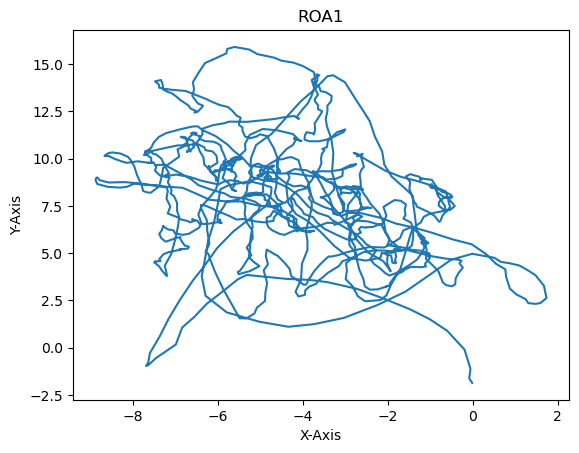

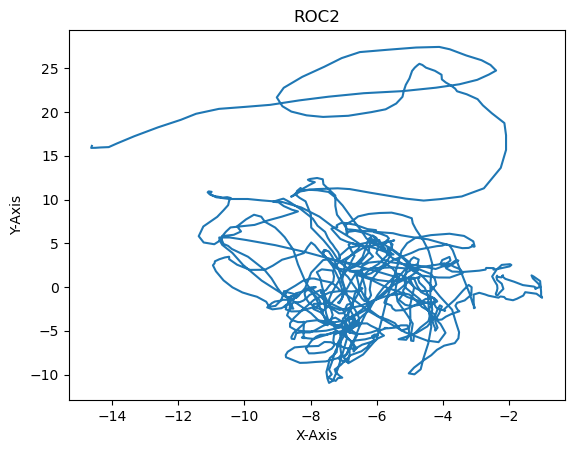

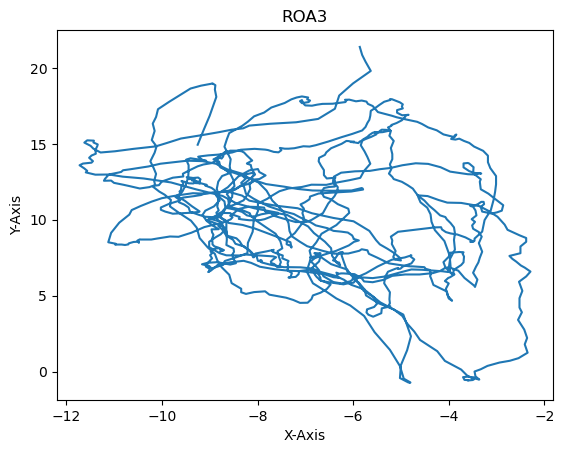

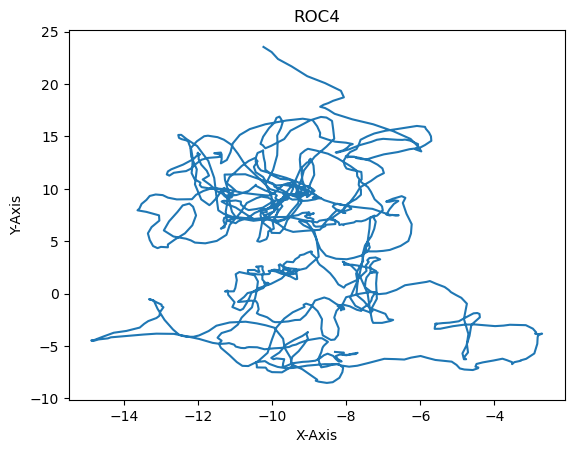

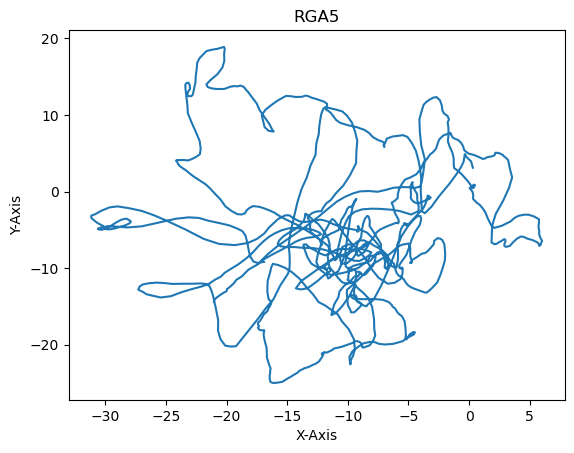

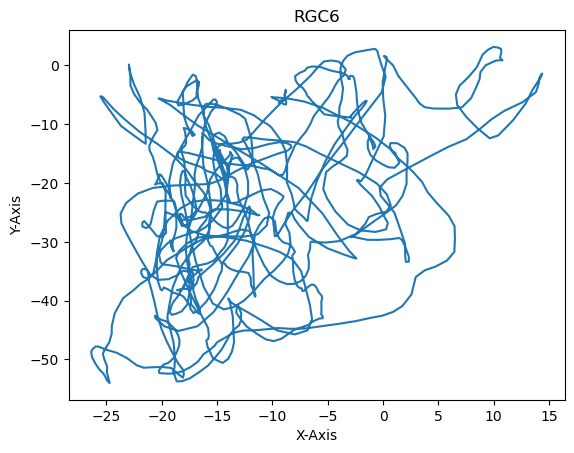

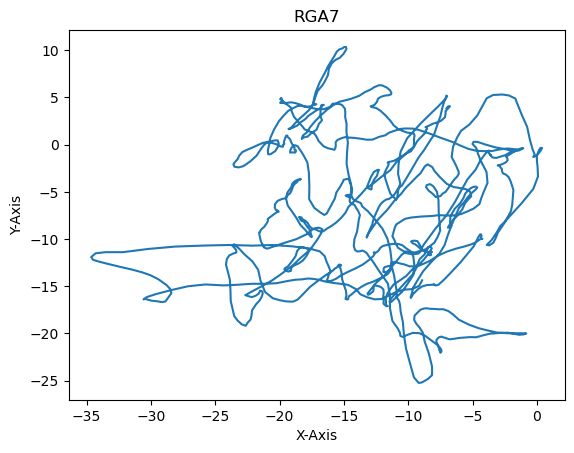

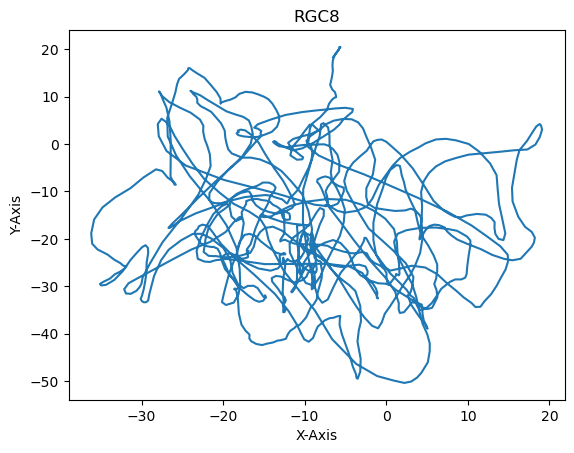

In [11]:
llista_test = df_resultats['test'].tolist()

for item in llista_test:
    punts_X = df_dades_postu_XY[item + "_X"].values.tolist()
    punts_Y = df_dades_postu_XY[item+"_Y"].values.tolist()
    plt.plot(punts_X,punts_Y)
    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")
    plt.title(item)
    plt.show()
    #punts_Fx = df_dades_postu_FxFy["ROA1_Fx"].values.tolist()
    #punts_Fy = df_dades_postu_FxFy["ROA1_Fy"].values.tolist()
    #plt.plot(punts_Fx,punts_Fy)
    #plt.xlabel("X-Axis")
    #plt.ylabel("Y-Axis")
    #plt.title("Fx Fy values Postu")
    #plt.show()


# Càlcul paràmetres posturògraf

In [12]:
params = {'Desplaç_total' : [], 'Angle_total' : [], 'Dispersio_ML' : [], 'Dispersio_AP' : [], 'Area_barrida' : []
         , 'V_mitjana' : [], 'Desplaç_ML' : [], 'Desplaç_AP' : [], 'Fmax_ML' : [], 'Fmax_AP' : []} 

## Càlcul desplaçament total

Càlcul del centre del núvol de punts(mitjana).

In [13]:
llista_test = df_resultats['test'].tolist()
punts_X = {}
punts_Y = {}

for item in llista_test:
    punts_X[item] = df_dades_postu_XY[item + "_X"].values.tolist()
    punts_Y[item] = df_dades_postu_XY[item+"_Y"].values.tolist()
    params['Desplaç_total'].append(np.sqrt((sum(punts_X[item])/len(punts_X[item]))**2 + (sum(punts_Y[item])/len(punts_Y[item]))**2))

## Càlcul Angle total

Calcular angle del vector del centre del núvol de punts, cambiar quadrant al que pertany.

In [14]:
def quadrant_vector(vector):
    """
    Retorna el quadrant al que pertany un vector.

    Args:
      vector: Vector a calcular(en graus).

    Return: 
      El quadrant del vector.
    """
    quadrants = []
    if vector[0] > 0:
        if vector[1] > 0:
            return 1
        else:
            return 4
    else:
        if vector[1] > 0:
            return 2
        else:
            return 3

In [15]:
def quadrant_angle(angle):
    """
    Retorna el quadrant de l'angle especificat.

    Args:
    angle: L'angle a calcular(en graus).

    Returns:
    El quadrant de l'angle.
    """
    if angle < 0:
        angle += 360

    if 0 <= angle < 90:
        return 1
    elif 90 <= angle < 180:
        return 2
    elif 180 <= angle < 270:
        return 3
    else:
        return 4

In [16]:
def canvi_quadrant(angle, quad_from, quad_to):
    """
    Rota un angle per passar-lo d'un quadrant a un altre
    
    Args:
      angle: L'angle a rotar(en graus).
      quad_from: Quadrant al que pertany l'angle originalment.
      quad_to: Quadrant al que es vol portar l'angle.
    
    Returns:
      L'angle rotat en graus.
    """
    angle_rad = math.radians(angle)

    rotacio = ((quad_to - quad_from) * (2 * math.pi / 4)) % (2 * math.pi)

    nou_angle_rad = angle_rad + rotacio

    nou_angle_deg = math.degrees(nou_angle_rad)

    return nou_angle_deg

In [17]:
for item in llista_test:
    vector_nuvp = [(sum(punts_X[item])/len(punts_X[item])),(sum(punts_Y[item])/len(punts_Y[item]))]
    
    quadrant_to = quadrant_vector(vector_nuvp)
    angle = math.degrees(math.atan(vector_nuvp[1]/vector_nuvp[0]))
    quadrant_from = quadrant_angle(angle)
    
    params['Angle_total'].append(canvi_quadrant(angle, quadrant_from, quadrant_to))

## Càlcul dispersió ML i AP

Calcular la desviació estàndard dels punts en X i en Y per separat.

In [18]:
for item in llista_test:
    centre_X = sum(punts_X[item])/(len(punts_X[item])-1)
    centre_Y = sum(punts_Y[item])/(len(punts_Y[item])-1)
    params['Dispersio_ML'].append(np.sqrt(sum([((x - centre_X) ** 2) for x in punts_X[item]]) / (len(punts_X[item])-1)))
    params['Dispersio_AP'].append(np.sqrt(sum([((y - centre_Y) ** 2) for y in punts_Y[item]]) / (len(punts_Y[item])-1)))

## Càlcul Àrea barrida

Trobar valors propis de matriu de covariances de les dades.

In [19]:
for item in llista_test:
    points = np.vstack((punts_X[item], punts_Y[item])).T
    dades_centrades = points - np.mean(points, axis=0)
    covariance_matrix = np.cov(dades_centrades, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    params['Area_barrida'].append(np.sqrt(eigenvalues[0]*eigenvalues[1])*4)

## Càlcul velocitat mitjana

Calcular la distància total recorreguda sumant la distància entre tots els punts consecutius, passar-ho a metres i dividir entre el temps de la prova.

In [20]:
for item in llista_test:
    points = np.vstack((punts_X[item], punts_Y[item])).T
    num_points = len(points)
    total_dist = 0.0

    for i in range(num_points - 1):
        total_dist += np.linalg.norm(points[i+1] - points[i])
            
    params['V_mitjana'].append((total_dist/1000)/30)

## Càlcul desplaçament ML i AP

Distància entre el major i el menor punt en cada eix.

In [21]:
for item in llista_test:
    params['Desplaç_ML'].append(np.max(punts_X[item]) - np.min(punts_X[item]))
    params['Desplaç_AP'].append(np.max(punts_Y[item]) - np.min(punts_Y[item]))

## Càlcul força màxima

Diferència entre el punt de més i de menys força en cada eix.

In [22]:
for item in llista_test:
    forca_X = df_dades_postu_FxFy[item + "_Fx"].values.tolist()
    forca_Y = df_dades_postu_FxFy[item+"_Fy"].values.tolist()
    params['Fmax_ML'].append(np.max(forca_X) - np.min(forca_X))
    params['Fmax_AP'].append(np.max(forca_Y) - np.min(forca_Y))

In [23]:
from sklearn.metrics import r2_score

In [25]:
# Calcular l'R²
r2 = []

r2.append(r2_score(df_resultats['Desplaz.Total(mm)'], params['Desplaç_total']))
r2.append(r2_score(df_resultats['Angulo Desplaz.(º)'], params['Angle_total']))
r2.append(r2_score(df_resultats['Dispers ML (mm)'], params['Dispersio_ML']))
r2.append(r2_score(df_resultats['Dispers AP (mm)'], params['Dispersio_AP']))
r2.append(r2_score(df_resultats['Area barrida (mm2)'], params['Area_barrida']))
r2.append(r2_score(df_resultats['Velocidad media (m/s)'], params['V_mitjana']))
r2.append(r2_score(df_resultats['Desplazam.ML (mm)'], params['Desplaç_ML']))
r2.append(r2_score(df_resultats['Desplazam.AP(mm)'], params['Desplaç_AP']))
r2.append(r2_score(df_resultats['Fuerza Max ML (N)'], params['Fmax_ML']))
r2.append(r2_score(df_resultats['Fuerza Max AP (N)'], params['Fmax_AP']))

In [30]:
r2

[0.9999999999947137,
 0.999999999988,
 0.9999999999882766,
 0.9999999958547436,
 0.9999999998787938,
 0.9999999996918685,
 1.0,
 1.0,
 1.0,
 1.0]

In [29]:
np.mean(r2)

0.9999999995396397

## Valoració final

Elipse - https://carstenschelp.github.io/2018/09/14/Plot_Confidence_Ellipse_001.html
(https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):

    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    print(ell_radius_x,ell_radius_y)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)
    return (ell_radius_x,ell_radius_y)
    #return ax.add_patch(ellipse)

def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]



In [ ]:
np.random.seed(0)

PARAMETERS = {
    'Positive correlation': [[0.85, 0.35],
                             [0.15, -0.65]],
    'Negative correlation': [[0.9, -0.4],
                             [0.1, -0.6]],
    'Weak correlation': [[1, 0],
                         [0, 1]],
}

def myfunc(x):
  return slope * x + intercept

center = sum(punts_X)/len(punts_X), sum(punts_Y)/len(punts_Y)

slope, intercept, r, p, std_err = stats.linregress(punts_X, punts_Y)
angle_in_radians = math.atan(slope)
angle_in_degrees = math.degrees(angle_in_radians)

mu = center[0],center[1]
scale = 3, 5

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, (title, dependency) in zip(axs, PARAMETERS.items()):
    #x, y = get_correlated_dataset(800, dependency, mu, scale)
    #print(type(x))
    x = np.array(punts_X)
    y = np.array(punts_Y)
    ax.scatter(x, y, s=1)
    

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax,n_std=2.0, edgecolor='red')
    #ax.plot(punts_X, mymodel, 'r')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)

    
plt.show()

In [ ]:
def print_elipse(X,Y, ax, title):
    center = sum(X)/len(X), sum(Y)/len(Y)

    slope, intercept, r, p, std_err = stats.linregress(X,Y)
    angle_in_radians = math.atan(slope)
    angle_in_degrees = math.degrees(angle_in_radians)

    mu = center[0],center[1]
    scale = 3, 5


    #x, y = get_correlated_dataset(800, dependency, mu, scale)
    #print(type(x))
    x = np.array(X)
    y = np.array(Y)
    ax.scatter(x, y, s=0.5)

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax,n_std=2.0, edgecolor='red')
    #ax.plot(punts_X, mymodel, 'r')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)


    
center = sum(punts_X)/len(punts_X), sum(punts_Y)/len(punts_Y)

slope, intercept, r, p, std_err = stats.linregress(punts_X, punts_Y)
angle_in_radians = math.atan(slope)
angle_in_degrees = math.degrees(angle_in_radians)

mu = center[0],center[1]
scale = 3, 5

longi = len(llista_test)
"""
if longi%2 == 0:
    fig, axs = plt.subplots(int(longi/2), 2, figsize=(18, 6))
else:
    fig, axs = plt.subplots(int((longi+1)/2), 2, figsize=(18, 6))
i=0

for item in llista_test:
    punts_X = df_dades_postu_XY[item + "_X"].values.tolist()
    punts_Y = df_dades_postu_XY[item+"_Y"].values.tolist()
    print(type(axs), axs[i])
    ax = axs[i]

    x = np.array(punts_X)
    y = np.array(punts_Y)
    ax.scatter(x, y, s=0.5)
    

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax,n_std=2.0, edgecolor='red')
    #ax.plot(punts_X, mymodel, 'r')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)
    i=i+1
  
plt.show()   
  """  
    
i=0


for item in llista_test:
    
    fig, ax = plt.subplots(1, 1, figsize=(18, 6))
    punts_X = df_dades_postu_XY[item + "_X"].values.tolist()
    punts_Y = df_dades_postu_XY[item+"_Y"].values.tolist()
    
    center = sum(punts_X)/len(punts_X), sum(punts_Y)/len(punts_Y)

    slope, intercept, r, p, std_err = stats.linregress(punts_X,punts_Y)
    angle_in_radians = math.atan(slope)
    angle_in_degrees = math.degrees(angle_in_radians)

    mu = center[0],center[1]
    scale = 3, 5

    x = np.array(punts_X)
    y = np.array(punts_Y)
    #ax.scatter(x, y, s=0.5)
    ax.plot(x, y)
    
    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    ex,ey = confidence_ellipse(x, y, ax,n_std=2.0, edgecolor='red')
    print(ex,ey)
    
    #ax.plot(punts_X, mymodel, 'r')

    ax.scatter(mu[0], mu[1], c='red', s=1)
    ax.set_title(item)
    
    #print(type(axs), axs[i])
    #print_elipse(punts_X,punts_Y, axs[i], item)
    #i=i+1

    plt.show()
  

#plt.show()   





In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array(punts_X).reshape(-1, 1)
y = np.array(punts_Y).reshape(-1, 1)


In [ ]:
model = LinearRegression()
model.fit(x,y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")


Formula per trobar punts dintre de la elipse
((x - h) / a)^2 + ((y - k) / b)^2 <= 1

In [ ]:
import math

def is_point_inside_ellipse(point, center, a, b):
    x, y = point
    h, k = center
    return ((x - h) / a) ** 2 + ((y - k) / b) ** 2 <= 1

def points_inside_ellipse(points, center, a, b):
    inside_points = []
    for point in points:
        if is_point_inside_ellipse(point, center, a, b):
            inside_points.append(point)
    return inside_points

In [ ]:
llista = list(range(0,1200))
plt.scatter(llista,df_dades_postu_XY["ROA1_X"], s=1)

In [ ]:
llista = list(range(0,1200))
plt.scatter(llista,df_dades_postu_FxFy["ROA1_Fx"], s=1)

In [ ]:
np.array(df_dades_postu_FxFy['ROA1_Fx'])

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
dx = np.zeros(len(df_dades_postu_FxFy["ROA1_Fx"]))
for i in range(len(df_dades_postu_FxFy["ROA1_Fx"])):
    dx[i] = np.trapz(df_dades_postu_FxFy["ROA1_Fx"][:i], dx=1) / (94.842879 * 9.81)

In [ ]:
np.trapz(df_dades_postu_FxFy["RGC8_Fx"])  / (94.842879 * 9.81)

In [ ]:
df_dades_postu_FxFy["ROA1_Fx"]/(94.842879 * 9.81)

In [ ]:
df_dades_postu_XY["ROA1_X"]

In [ ]:
df_dades_postu_XY["ROA1_X"]

In [ ]:
df_dades_postu_FxFy['ROA1_Fx']/(94.842879 * 9.81)

In [ ]:
dx